# Numerov algorithm

In [36]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt


In [37]:
#Discretización del dominio - Punto c
def x_discrete(a,b): 
    return np.linspace(-5,5,1000)
x = x_discrete(-5,5)

In [38]:
#Potential - Punto D
def potential (x,w): 
    return (1/2)*w*(x**2)

def gaussianPotential(x):
    pass
#Other potentials -Punto i,j
def rationalPotential(x):
    pass

In [39]:
#Algoritmo de numerov - Punto e
def phi2(x_array,E):

    w = 1
    h_barra = 1
    m = 1
    h = 10/999
    result = []

    i = 0
    norm = 0 
    for x in x_array: 

        
        if i ==0: 
            result.append(0)
        elif i ==1: 
            result.append(1e-5)
            norm+=1e-5
        else: 
            r_n = ((2*m)/(h_barra**2))*(potential(x_array[i],w)-E)
            r_n_m= ((2*m)/(h_barra**2))*(potential(x_array[i-1],w)-E)
            r_n_m_m= ((2*m)/(h_barra**2))*(potential(x_array[i-2],w)-E)

            num = (2*result[i-1]*(1+((5*(h**2)*r_n_m)/(12))))-(result[i-2]*(1-(((h**2)*r_n_m_m)/(12))))
            den = (1-(((h**2)*r_n)/(12)))

            result.append(num/den)
            norm+=abs(num/den)            
        i+=1

    #Normalizar
    result = np.array(result)
    result/=norm
    result = list(result)

    return result

In [40]:
#Valores propios - Punto f

def findEigenvalues(e_0,e_f,dE,x): 

    e = e_0
    eigenValues = []

    while e <= e_f:
        phi_E = phi2(x,e)[-1]
        phi_dE=phi2(x,e+dE)[-1]

        if phi_E*phi_dE <0:
            eigenValues.append(e)

        e+=dE

    return eigenValues


eigen = findEigenvalues(0,6,0.001,x)

TypeError: 'function' object is not iterable

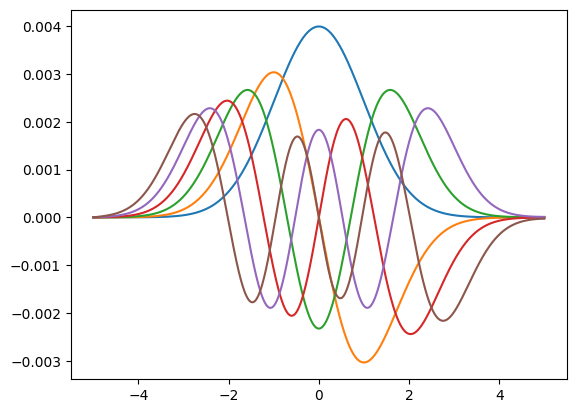

In [ ]:

#Energias -Punto g 

E = [0.5,1.5,2.5,3.5,4.5,5.5]

for en in E: 
    result =phi2(x,en)
    plt.plot(x,result)
plt.show()
